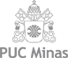
<B>PONTIFÍCIA UNIVERSIDADE CATÓLICA DE MINAS GERAIS

NÚCLEO DE EDUCAÇÃO A DISTÂNCIA

Pós-graduação Lato Sensu em Ciência de Dados e Big Data

Título: Segmentação de Vendedores do marketplace Olist Store em 2017

Aluno: Alexandre Luís Nunes Cardiga</B>


<B>Nome:</B> 03_00_Reducao_Dimensao.ipynb

<B>Data:</B> 20/03/2022
    
<B>Objetivo:</B>
    
<B>Bibliotecas:</B>  sys,pandas, numpy,matplotlib,BeautifulSoup,bs4,urllib,minhas_funcoes
<a class="anchor" id="etapas"></a>
## Indice

1. [Reescala dos dados](#rescalar)<br>
&emsp;1.1 [MinMaxScaler](#minmax)<br>
&emsp;1.2 [RobustScaler](#robust)<br>
&emsp;1.3 [PowerTransformer](#power)<br>
2. [Redução Dimensões](#reduzdimi)<br>
&emsp;2.1 [PCA](#pca)<br>
&emsp;2.2 [t-SNE](#tsne)<br>
&emsp;2.3 [UMAP](#uma)<br>
3. [Sem Redução](#semr)<br>


<p><b>Localização Projeto: </b> <a href = 'https://github.com/Alexandre-316/Projeto_Ciencia_de_Dados' target = "_blank">Git Hub</a></p>

In [1]:
#!pip install umap-learn

In [2]:
# Apaga todas as variáveis
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
%whos

Interactive namespace is empty.


In [4]:
import sys
import os
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt


import seaborn as sns
#import datetime

from datetime import datetime
from scipy import stats
from scipy.stats    import normaltest, kstest
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from sklearn.preprocessing import MinMaxScaler,RobustScaler,PowerTransformer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import umap
import warnings 
if not sys.warnoptions:
    #warnings.filterwarnings('ignore')
    warnings.simplefilter('ignore')

# Define a pasta onde está o arquivo minhas_funcoes.py
sys.path.insert(0, '../Lib')

# Importar minhas_funcoes.py
import minhas_funcoes as mf

import locale
locale.setlocale(locale.LC_ALL, 'pt_BR.utf8')

caminho = '../Data/'
caminho_temp = '../Template/'

#exibe todas as colunas
#pd.set_option('display.max_columns', None)
pd.set_option('display.max_columns', 150)
#pd.set_option('display.max_columns', 999999999)
#pd.set_option('display.max_rows', 999999999)
pd.set_option('display.max_rows', 150)

## <a class="anchor" id="rescalar">1. Reescala dos dados</a>
[Retorna ao Indice](#etapas)

In [5]:
df_abt_orig = pd.read_excel(caminho_temp+'01_Coleta_Processamento_df_Analytic_Base_Table.xlsx')
df_abt = pd.read_excel(caminho_temp+'02_Coleta_Processamento_df_abt_sem_correlacao.xlsx')

In [6]:
df_abt.shape

(1658, 23)

In [7]:
df_abt_orig.shape

(1658, 114)

In [8]:
df_abt_= df_abt.select_dtypes(include=["int64", "float64"])

In [10]:
df_abt_rfm=df_abt_orig[['qtd_pedidos_pontos','preco_pontos','review_score_pontos','tempo_postagem_compra_pontos']]

<AxesSubplot:>

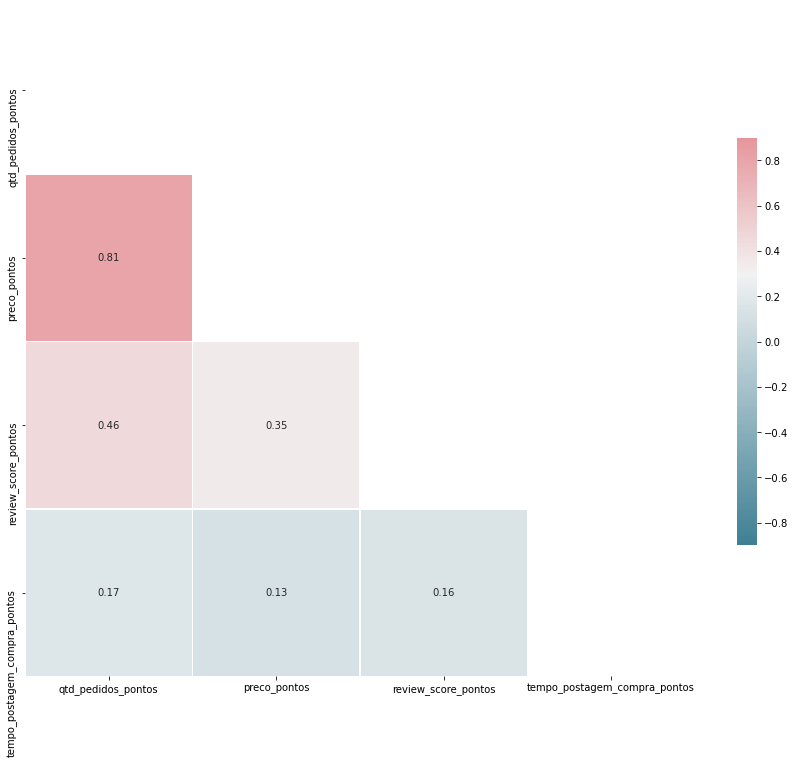

In [11]:
v_max=0.9
v_min=-0.9
v_centre=0.3
final_data_spearman=round(df_abt_rfm.corr(method='spearman'),2)
mask = np.triu(np.ones_like(final_data_spearman, dtype=np.bool))
f, ax = plt.subplots(figsize=(15, 15))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(final_data_spearman, mask=mask, cmap=cmap, vmax=v_max,vmin=v_min, center=v_centre,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)


In [12]:
mf.vif_calculo(df_abt_rfm).sort_values(by='VIF', ascending=False)

features        VIF
0            qtd_pedidos_pontos  17.113807
1                  preco_pontos  16.548803
2           review_score_pontos  10.886140
3  tempo_postagem_compra_pontos   6.195545

In [13]:
#Quando foi feito feature engineering, foram criadas as features 'qtd_pedidos_pontos','preco_pontos','review_score_pontos',
#vendedor pontuacao e vendedor_score para serem utilizados em uma nova base de dados.
#Mas, como verificado acima isto não será possível pela multicolinearidade(>5) entre as features, portanto está cancelado.


In [14]:
display(df_abt_.std().sort_values(ascending=False),df_abt_.mean().sort_values(ascending=False))

produto_peso_g_mediana                         4247.726256
habit_km2_mediana                              2250.930774
Area(km2)_mediana                              1071.218947
lucro                                          1031.994389
distancia_cliente_vendedor_mediana              431.798770
vlr_medio_pedido                                170.428507
dias_entre_pedidos                               15.851728
qtd_mes_12                                       10.605566
produto_categoria_id_moda                         9.896040
qtd_mes_06                                        6.487368
entrega_estimado_dias_atraso_mediana              4.610464
qtd_mes_04                                        4.536388
postagem_limiteparceiro_variacao_mediana          4.287445
qtd_mes_02                                        3.351031
postagem_limiteparceiro_dias_atraso_mediana       2.733117
PIB_percapita_(3285,11000]                        2.634936
qtd_mes_01                                        2.1259

produto_peso_g_mediana                         2328.396261
habit_km2_mediana                              2138.170528
Area(km2)_mediana                               939.239646
distancia_cliente_vendedor_mediana              550.969478
vlr_medio_pedido                                175.592153
lucro                                           115.332636
produto_categoria_id_moda                        16.161641
dias_entre_pedidos                               12.820265
qtd_mes_12                                        3.246683
qtd_mes_06                                        1.857660
qtd_mes_04                                        1.349819
qtd_mes_02                                        0.977081
PIB_percapita_(3285,11000]                        0.771411
qtd_mes_01                                        0.441496
postagem_limiteparceiro_dias_atraso_mediana       0.419180
entrega_estimado_dias_atraso_mediana              0.412545
postagem_limiteparceiro_variacao_mediana         -3.5560

In [15]:
df_abt_.columns

Index(['distancia_cliente_vendedor_mediana', 'produto_peso_g_mediana',
       'produto_categoria_id_moda', 'Area(km2)_mediana', 'habit_km2_mediana',
       'postagem_limiteparceiro_variacao_mediana',
       'postagem_limiteparceiro_dias_atraso_mediana',
       'entrega_estimado_dias_atraso_mediana', 'PIB_percapita_(3285,11000]',
       'qtd_mes_01', 'qtd_mes_02', 'qtd_mes_04', 'qtd_mes_06', 'qtd_mes_12',
       'lucro', 'dias_entre_pedidos', 'vlr_medio_pedido'],
      dtype='object')

## <a class="anchor" id="minmax">1.1 MinMaxScaler</a>

In [16]:
"""
O MinMaxScaler é uma outra alternativa a reescala de dados, seu diferencial se dá uma vez que este age sobre sobre a coluna,
ou seja, o cálculo da reescala é feito de forma independente entre cada coluna, de tal forma que a nova escala se dará 
entre 0 e 1 (ou -1 e 1 se houver valores negativos no dataset). Importante ressaltar que essa técnica funciona melhor se 
a distribuição dos dados não for normal e se o desvio padrão for pequeno, além disso o MinMaxScaler não reduz de forma 
eficaz o impacto de outliers e também preserva a distribuição original. De forma simples o MinMaxScaler subtrai o valor 
em questão pelo menor valor da coluna e então divide pela diferença entre o valor máximo e mínimo:
valor = ( valor — Coluna.min) / (Coluna.max — Coluna.min)
"""

'\nO MinMaxScaler é uma outra alternativa a reescala de dados, seu diferencial se dá uma vez que este age sobre sobre a coluna,\nou seja, o cálculo da reescala é feito de forma independente entre cada coluna, de tal forma que a nova escala se dará \nentre 0 e 1 (ou -1 e 1 se houver valores negativos no dataset). Importante ressaltar que essa técnica funciona melhor se \na distribuição dos dados não for normal e se o desvio padrão for pequeno, além disso o MinMaxScaler não reduz de forma \neficaz o impacto de outliers e também preserva a distribuição original. De forma simples o MinMaxScaler subtrai o valor \nem questão pelo menor valor da coluna e então divide pela diferença entre o valor máximo e mínimo:\nvalor = ( valor — Coluna.min) / (Coluna.max — Coluna.min)\n'

(1658, 17)


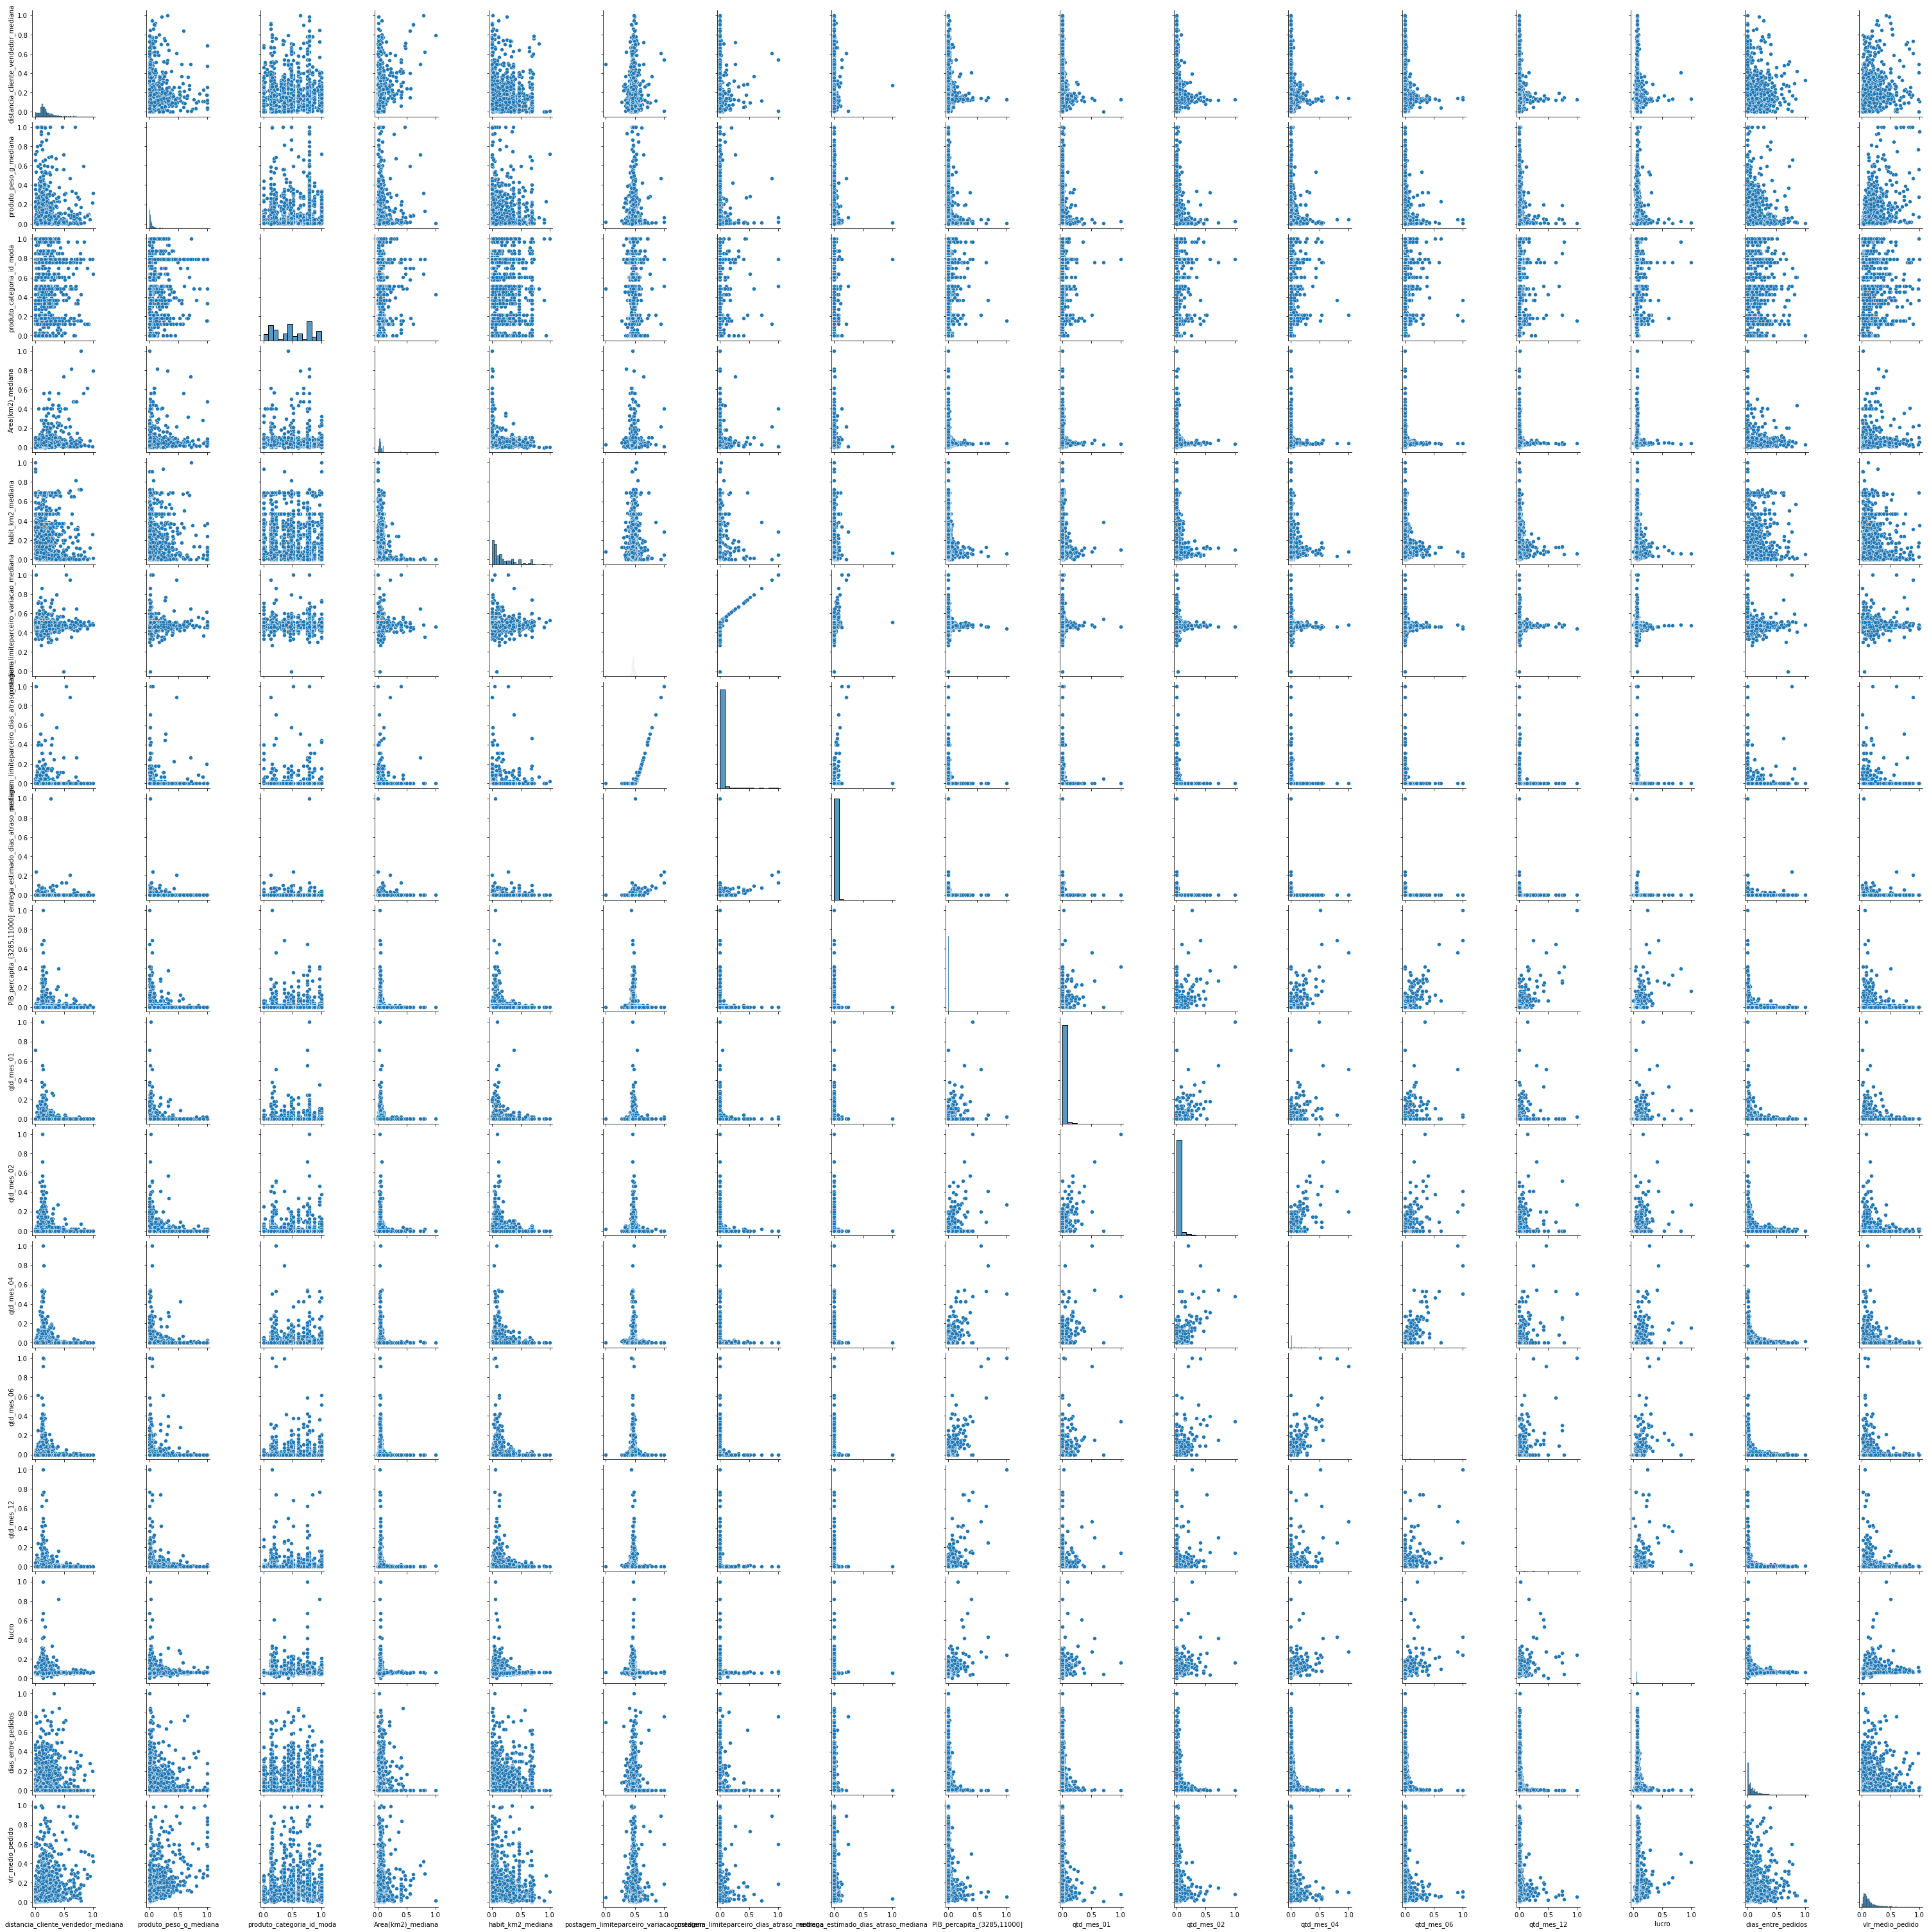

In [17]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df_abt_)
df_minmax = pd.DataFrame(scaled, columns=df_abt_.columns)
print(df_minmax.shape)
sns.pairplot(df_minmax)

In [18]:
#Comparando depois de aplicar MinMaxScaler e analisando pelo desvio padrão, 6 features c/ valores mais altos como verificado,
#
#1)produto_peso_g_mediana                         4247.726256
#2)habit_km2_mediana                              2250.930774
#3)Area(km2)_mediana                              1071.218947
#4)lucro                                          1031.994389
#5)distancia_cliente_vendedor_mediana              431.798770
#6)vlr_medio_pedido                                170.428507
#passaram a:
#1)produto_categoria_id_moda                      0.299880
#2)habit_km2_mediana                              0.196088
#3)distancia_cliente_vendedor_mediana             0.143187
#4)produto_peso_g_mediana                         0.141827
#5)vlr_medio_pedido                               0.141109
#6)dias_entre_pedidos                             0.124817
#7)Area(km2)_mediana                              0.074367
#Condensados próximos da média

In [19]:
display(df_minmax.std().sort_values(ascending=False),df_minmax.mean().sort_values(ascending=False))

produto_categoria_id_moda                      0.299880
habit_km2_mediana                              0.196088
distancia_cliente_vendedor_mediana             0.143187
produto_peso_g_mediana                         0.141827
vlr_medio_pedido                               0.141109
dias_entre_pedidos                             0.124817
Area(km2)_mediana                              0.074367
qtd_mes_06                                     0.065529
qtd_mes_04                                     0.062142
qtd_mes_12                                     0.060952
postagem_limiteparceiro_dias_atraso_mediana    0.060736
qtd_mes_02                                     0.059840
PIB_percapita_(3285,11000]                     0.054894
lucro                                          0.050477
qtd_mes_01                                     0.047243
postagem_limiteparceiro_variacao_mediana       0.046102
entrega_estimado_dias_atraso_mediana           0.027608
dtype: float64

produto_categoria_id_moda                      0.489747
postagem_limiteparceiro_variacao_mediana       0.477891
habit_km2_mediana                              0.186196
distancia_cliente_vendedor_mediana             0.182355
vlr_medio_pedido                               0.135755
dias_entre_pedidos                             0.093073
produto_peso_g_mediana                         0.076073
lucro                                          0.071006
Area(km2)_mediana                              0.064140
qtd_mes_06                                     0.018764
qtd_mes_12                                     0.018659
qtd_mes_04                                     0.018491
qtd_mes_02                                     0.017448
PIB_percapita_(3285,11000]                     0.016071
qtd_mes_01                                     0.009811
postagem_limiteparceiro_dias_atraso_mediana    0.009315
entrega_estimado_dias_atraso_mediana           0.002470
dtype: float64

## <a class="anchor" id="robust">1.2 RobustScaler</a>

In [20]:
"""
Também atua sobre as colunas e o diferencial deste método é a combinação com o uso de quartis o que nos garante um bom 
tratamento dos outliers. Em seu método o RobustScaler subtrai a média do valor em questão e então divide o resultado 
pelo segundo quartil. Importante notar que os outliers ainda estão presentes porém estão representados dentro de uma 
escala em que o seu impacto negativo é reduzido.
"""

'\nTambém atua sobre as colunas e o diferencial deste método é a combinação com o uso de quartis o que nos garante um bom \ntratamento dos outliers. Em seu método o RobustScaler subtrai a média do valor em questão e então divide o resultado \npelo segundo quartil. Importante notar que os outliers ainda estão presentes porém estão representados dentro de uma \nescala em que o seu impacto negativo é reduzido.\n'

(1658, 17)


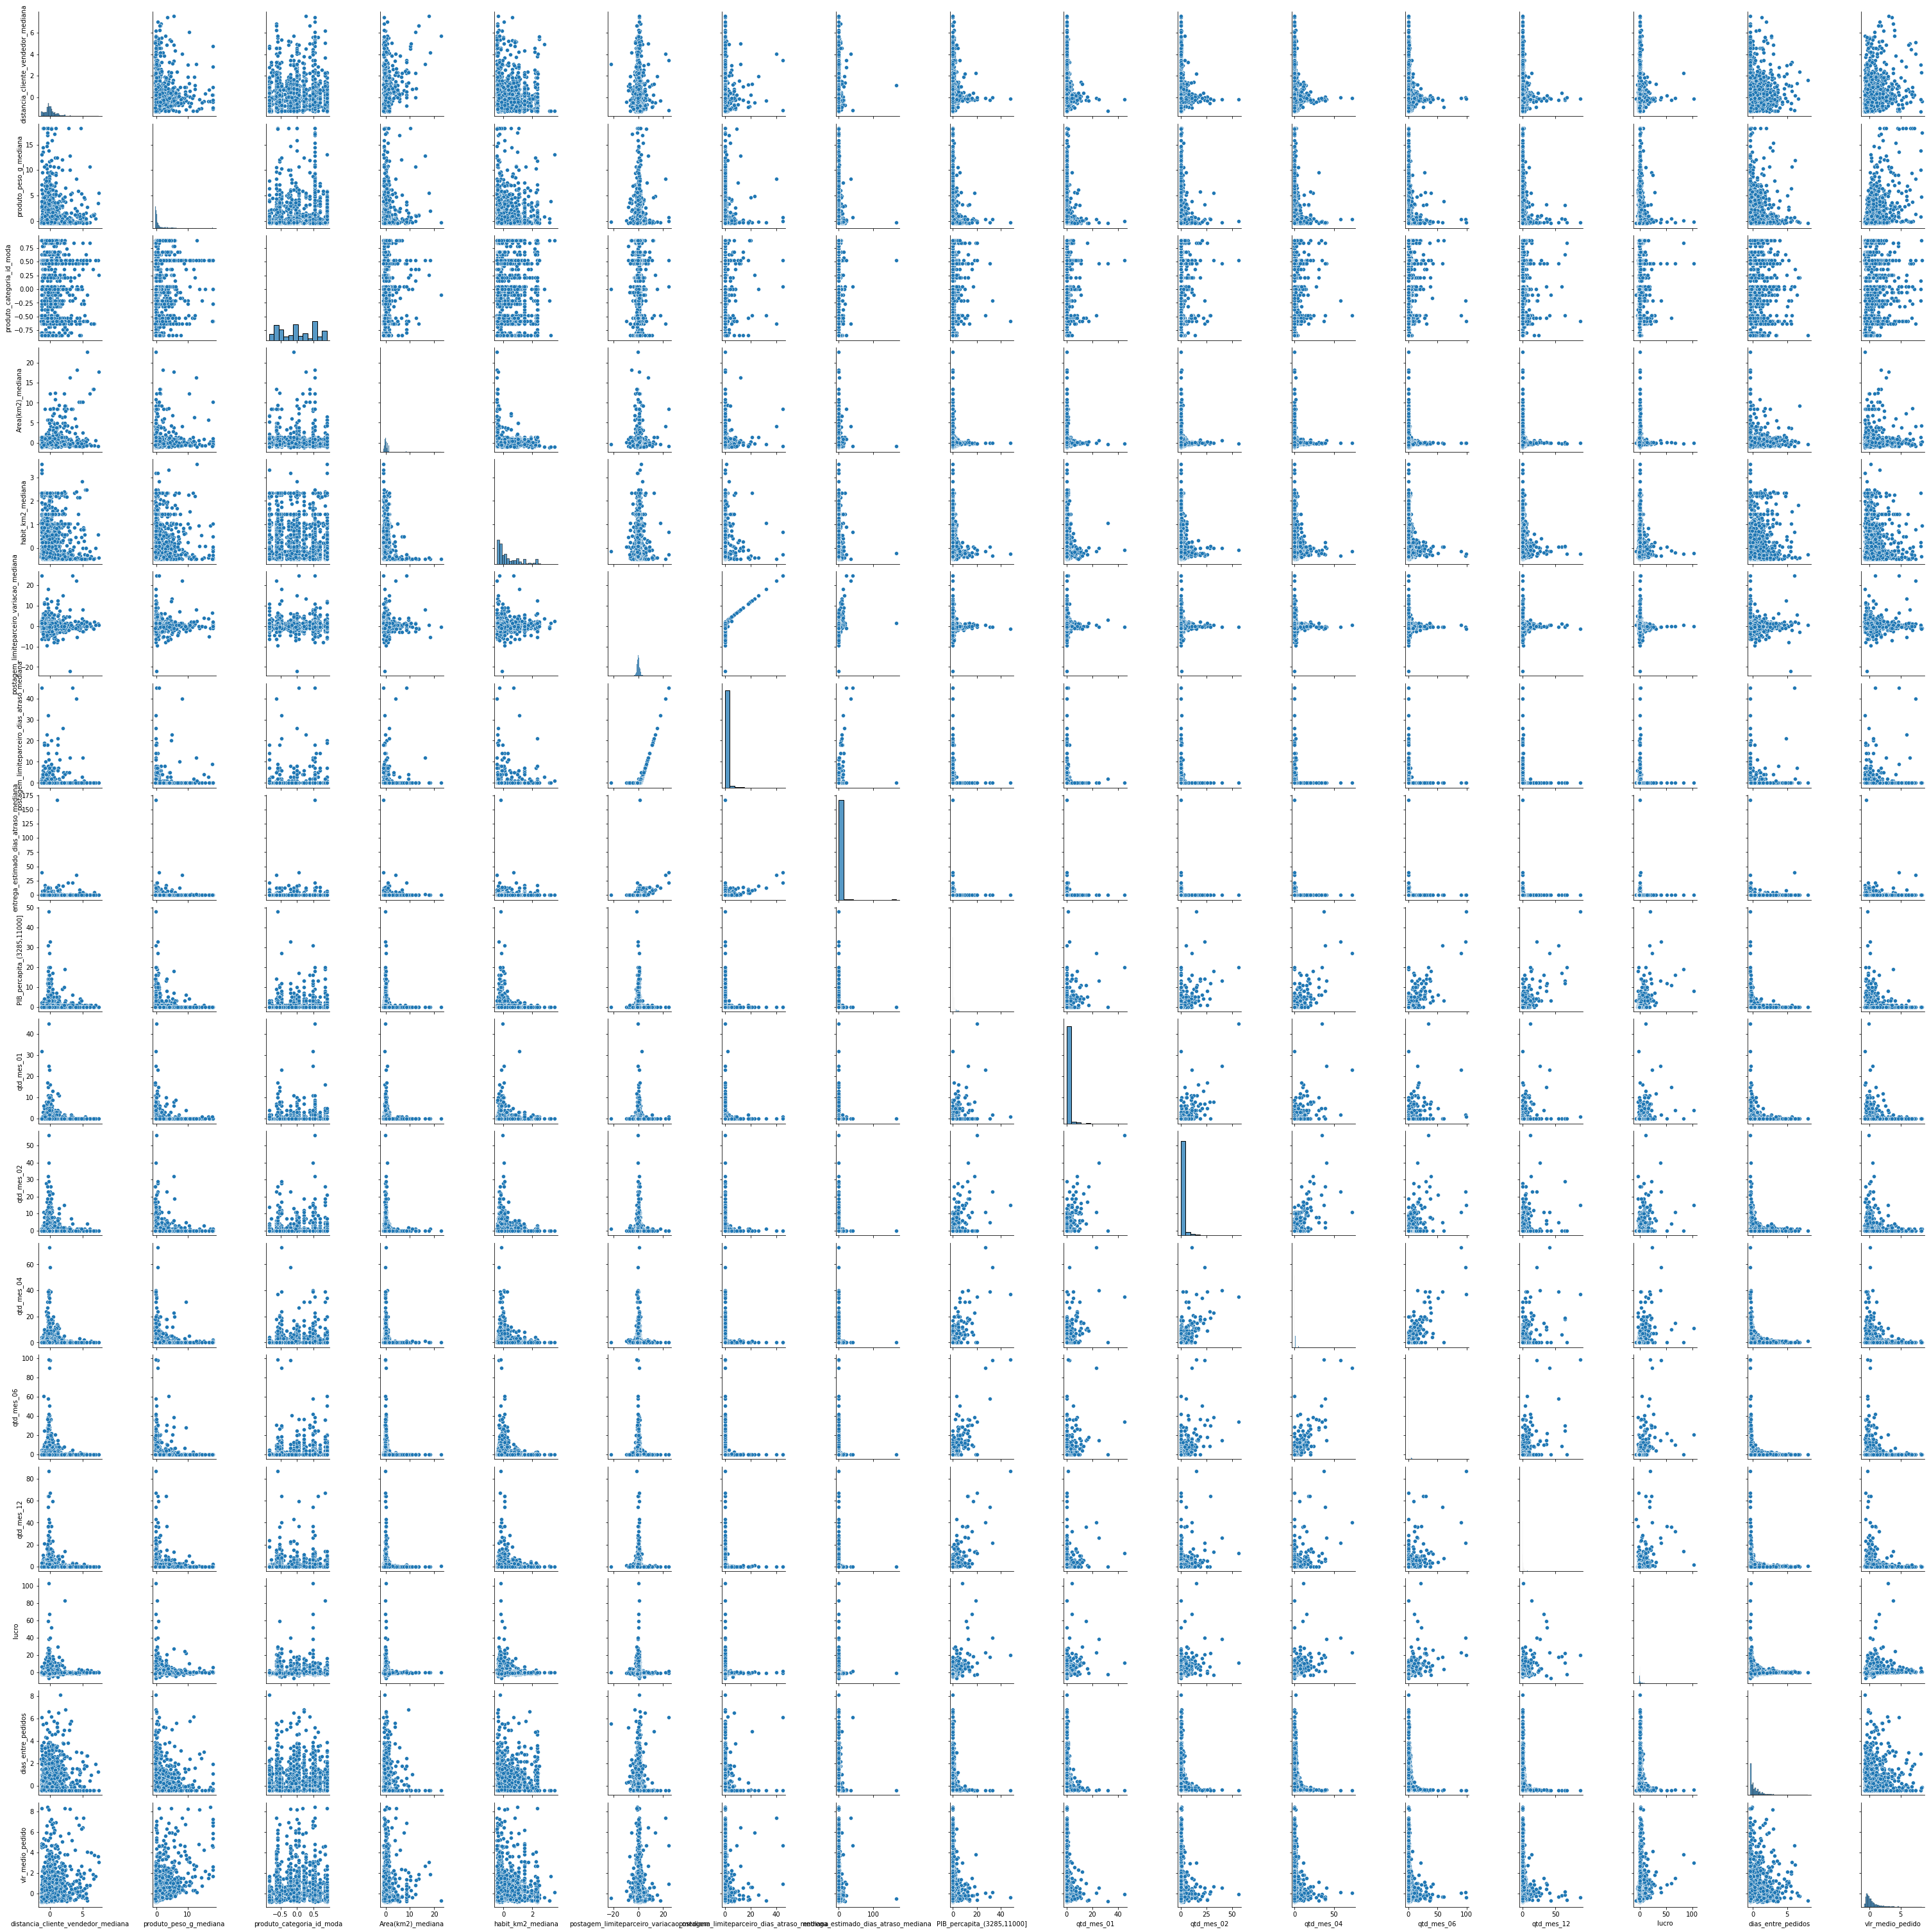

In [21]:
rscaler = RobustScaler() 
scaled_robust = rscaler.fit_transform(df_abt_)
df_robust = pd.DataFrame(scaled_robust, columns = df_abt_.columns)
print(df_robust.shape)
sns.pairplot(df_robust)


In [22]:
display(df_robust.std().sort_values(ascending=False),df_robust.mean().sort_values(ascending=False))

qtd_mes_06                                     6.487368
lucro                                          5.550595
qtd_mes_12                                     5.302783
entrega_estimado_dias_atraso_mediana           4.610464
qtd_mes_04                                     4.536388
qtd_mes_02                                     3.351031
postagem_limiteparceiro_dias_atraso_mediana    2.733117
produto_peso_g_mediana                         2.648621
PIB_percapita_(3285,11000]                     2.634936
postagem_limiteparceiro_variacao_mediana       2.143723
qtd_mes_01                                     2.125913
Area(km2)_mediana                              1.777287
vlr_medio_pedido                               1.311342
distancia_cliente_vendedor_mediana             1.262154
dias_entre_pedidos                             1.056782
habit_km2_mediana                              0.787812
produto_categoria_id_moda                      0.520844
dtype: float64

qtd_mes_06                                     1.857660
qtd_mes_12                                     1.623341
qtd_mes_04                                     1.349819
lucro                                          1.212681
qtd_mes_02                                     0.977081
produto_peso_g_mediana                         0.953014
PIB_percapita_(3285,11000]                     0.771411
qtd_mes_01                                     0.441496
postagem_limiteparceiro_dias_atraso_mediana    0.419180
entrega_estimado_dias_atraso_mediana           0.412545
vlr_medio_pedido                               0.405164
dias_entre_pedidos                             0.388018
Area(km2)_mediana                              0.385031
distancia_cliente_vendedor_mediana             0.300540
habit_km2_mediana                              0.290590
postagem_limiteparceiro_variacao_mediana       0.221954
produto_categoria_id_moda                      0.008507
dtype: float64

## <a class="anchor" id="power">1.3 PowerTransformer</a>

In [23]:
"""
Atua sobre as colunas e assim como o Quantile procura transformar os valores em uma distribuição mais normal, sendo 
indicado em situações onde uma distribuição normal é desejada para os dados, além disso esse método ainda suporta os 
métodos de transformação.

"""

'\nAtua sobre as colunas e assim como o Quantile procura transformar os valores em uma distribuição mais normal, sendo \nindicado em situações onde uma distribuição normal é desejada para os dados, além disso esse método ainda suporta os \nmétodos de transformação.\n\n'

(1658, 17)


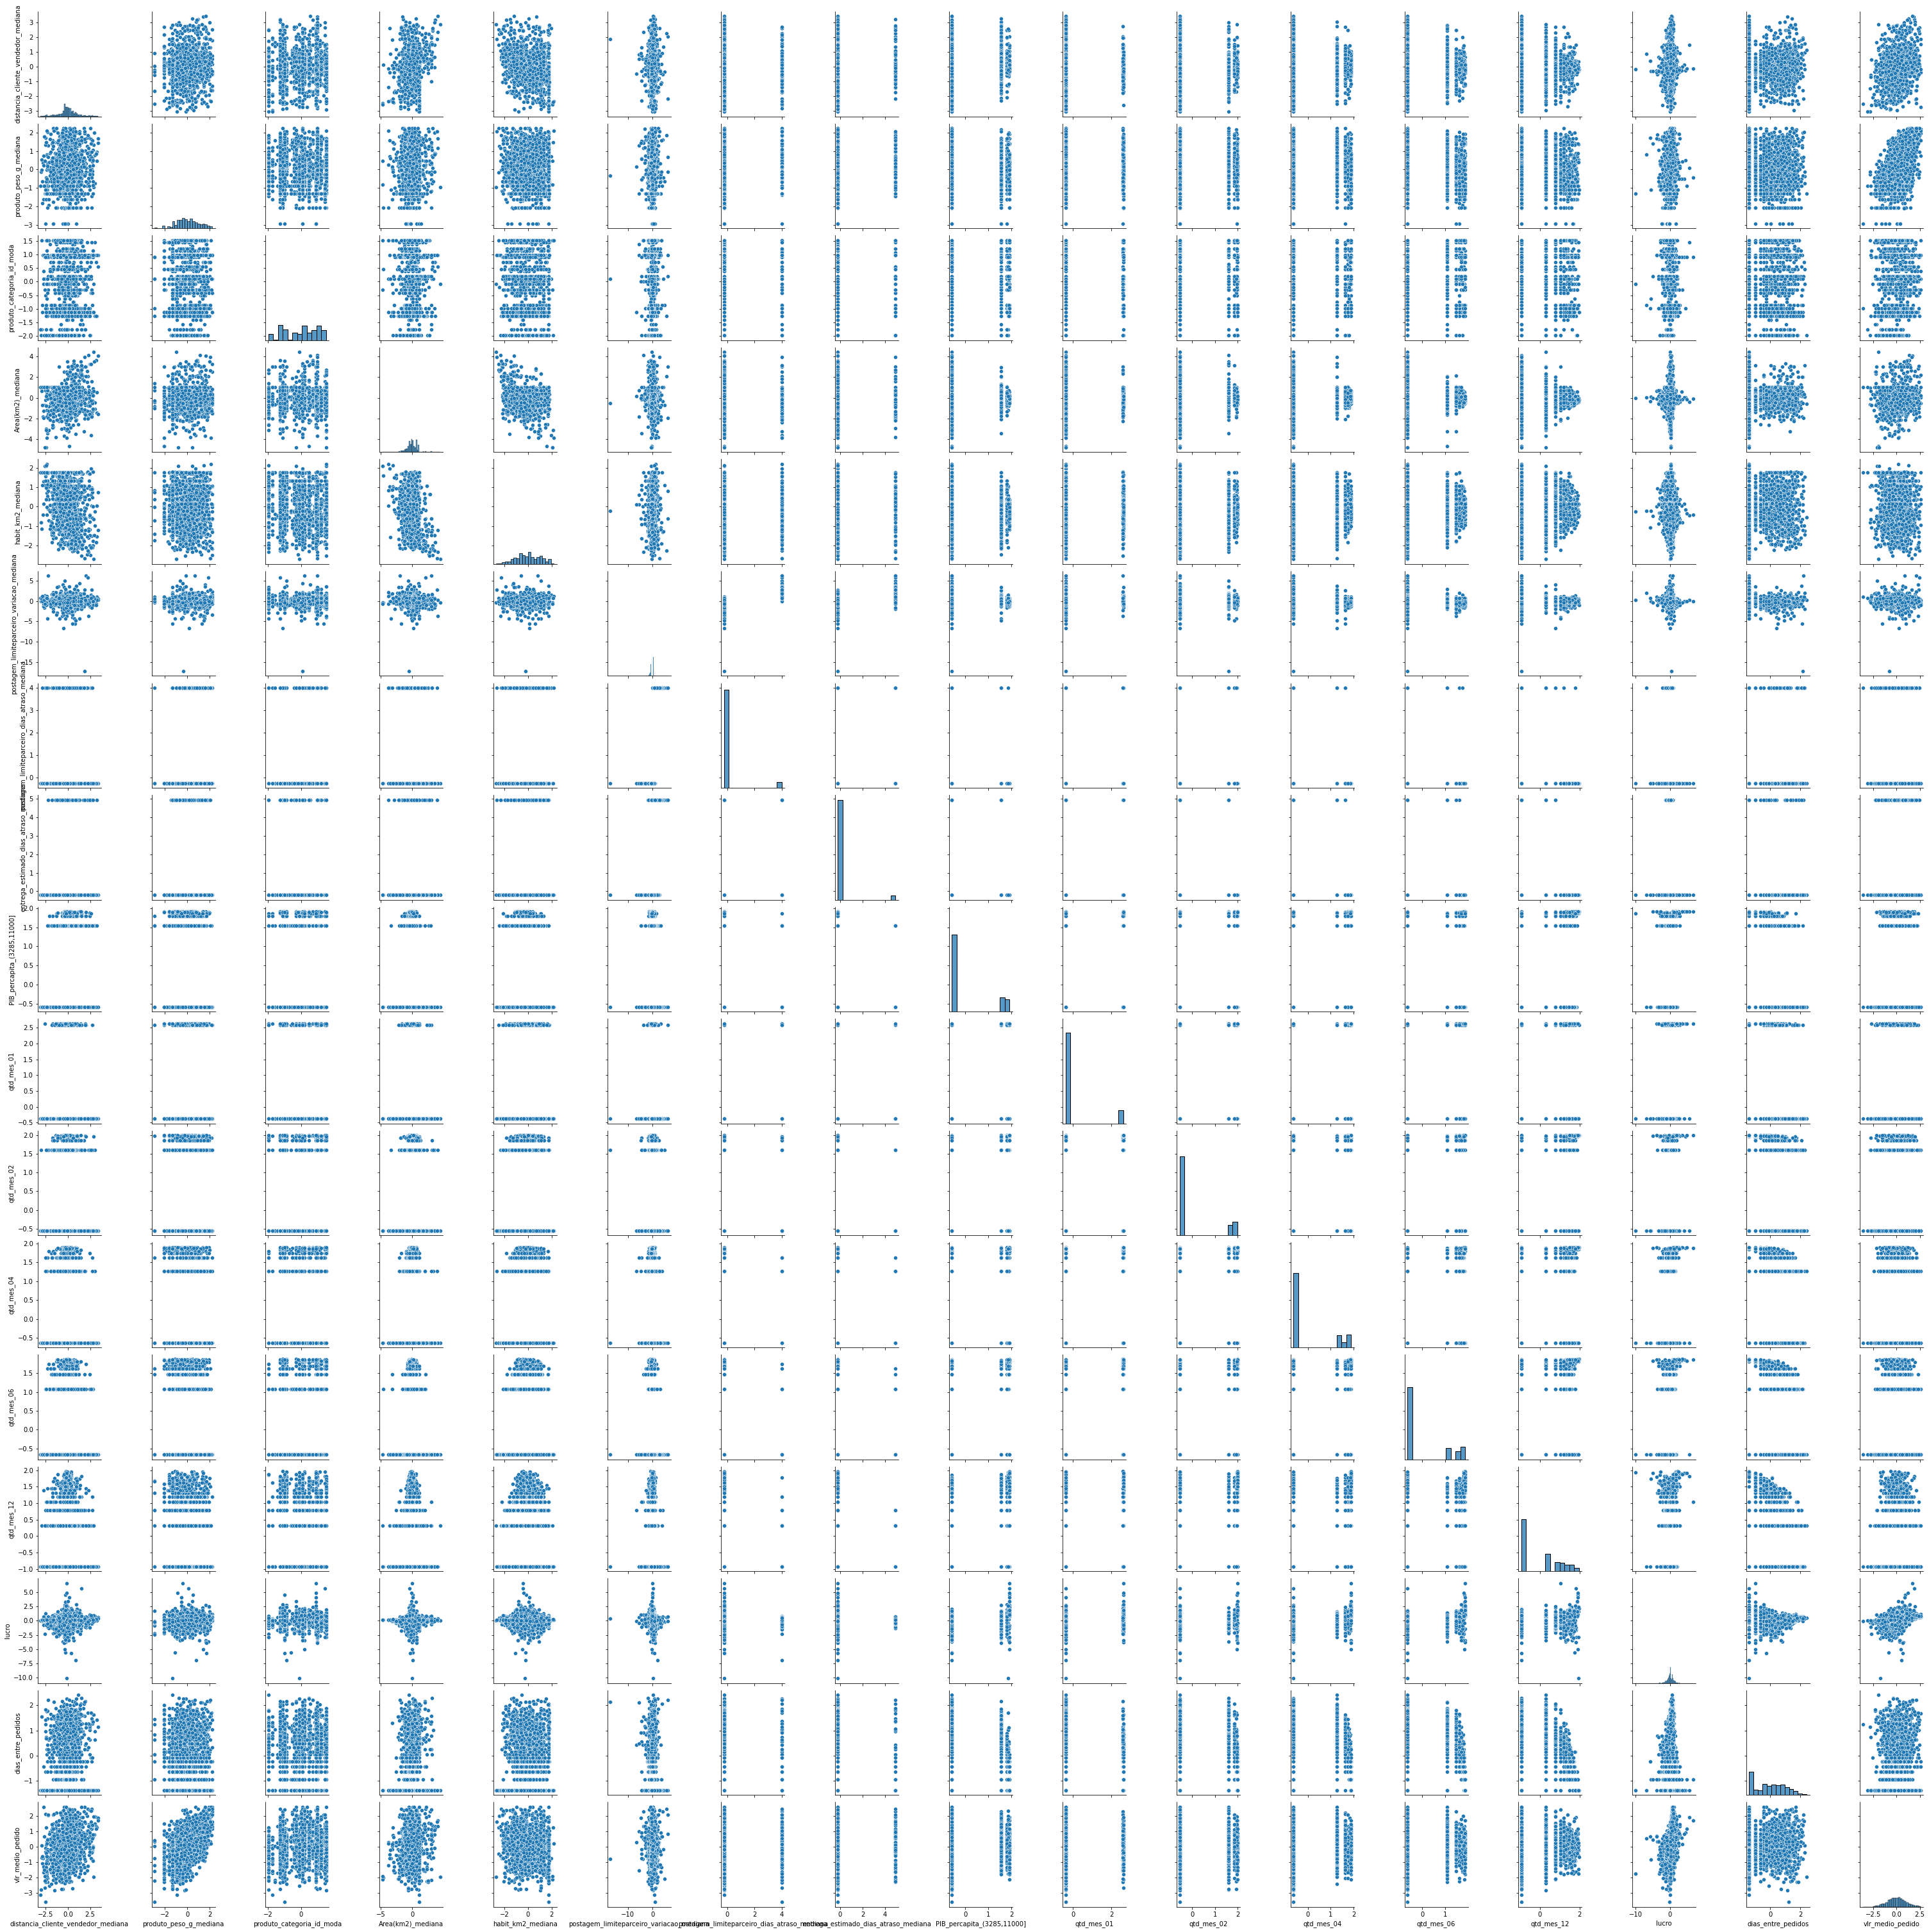

In [24]:
ptscaler = PowerTransformer(method='yeo-johnson') 
scaled_pt = ptscaler.fit_transform(df_abt_)
df_power = pd.DataFrame(scaled_pt, columns = df_abt_.columns)
print(df_power.shape)
sns.pairplot(df_power)

In [25]:
display(df_power.std().sort_values(ascending=False),df_power.mean().sort_values(ascending=False))

PIB_percapita_(3285,11000]                     1.000302
postagem_limiteparceiro_dias_atraso_mediana    1.000302
qtd_mes_01                                     1.000302
qtd_mes_06                                     1.000302
Area(km2)_mediana                              1.000302
dias_entre_pedidos                             1.000302
habit_km2_mediana                              1.000302
lucro                                          1.000302
distancia_cliente_vendedor_mediana             1.000302
vlr_medio_pedido                               1.000302
postagem_limiteparceiro_variacao_mediana       1.000302
produto_peso_g_mediana                         1.000302
produto_categoria_id_moda                      1.000302
qtd_mes_12                                     1.000302
qtd_mes_04                                     1.000302
qtd_mes_02                                     1.000302
entrega_estimado_dias_atraso_mediana           1.000302
dtype: float64

vlr_medio_pedido                               1.145981e-15
Area(km2)_mediana                              9.710099e-16
produto_peso_g_mediana                         7.633620e-16
postagem_limiteparceiro_dias_atraso_mediana    4.725144e-16
qtd_mes_04                                     2.678463e-16
qtd_mes_01                                     2.284729e-16
qtd_mes_12                                     2.251248e-16
dias_entre_pedidos                             2.016883e-16
qtd_mes_06                                     8.571082e-17
habit_km2_mediana                              5.561159e-17
postagem_limiteparceiro_variacao_mediana       2.865956e-17
lucro                                         -5.196219e-17
PIB_percapita_(3285,11000]                    -9.227306e-17
distancia_cliente_vendedor_mediana            -2.835153e-16
produto_categoria_id_moda                     -2.845867e-16
qtd_mes_02                                    -4.632402e-16
entrega_estimado_dias_atraso_mediana    

## <a class="anchor" id="reduzdimi">2. Reduções das Dimensões</a>
[Retorna ao Indice](#etapas)

In [26]:
"""
Ao utilizar um componente principal de análise, um dos objetivos principais é reduzir a dimensionalidade dos dados – 
na realidade, reduzindo a complexidade do problema. Redução de dimensionalidade tem um custo: Poucas dimensões utilizadas 
implicam em menor variância total dos dados que estão sendo explicados. Por causo disso, a taxa de variância explicada 
cumulativa é extremamente importante para saber como várias dimensões são necessárias para o problema. Além disso, se uma 
quantidade significativa de variância é explicada por apenas duas ou três dimensões, os dados reduzidos podem ser 
visualizados depois.
"""

'\nAo utilizar um componente principal de análise, um dos objetivos principais é reduzir a dimensionalidade dos dados – \nna realidade, reduzindo a complexidade do problema. Redução de dimensionalidade tem um custo: Poucas dimensões utilizadas \nimplicam em menor variância total dos dados que estão sendo explicados. Por causo disso, a taxa de variância explicada \ncumulativa é extremamente importante para saber como várias dimensões são necessárias para o problema. Além disso, se uma \nquantidade significativa de variância é explicada por apenas duas ou três dimensões, os dados reduzidos podem ser \nvisualizados depois.\n'

## <a class="anchor" id="pca">2.1. PCA</a>

In [27]:
"""
A Análise de Componentes Principais (PCA) é de longe o algoritmo de redução de dimensionalidade mais popular. Primeiro, 
identifica o hiperplano mais próximo dos dados e, em seguida, projeta os dados nele.

Quando nos deparamos com um grande conjunto de variáveis ​​correlacionadas, os componentes principais permitem resumir 
esse conjunto com um número menor de variáveis ​​representativas que explicam coletivamente a maior parte da variabilidade
do conjunto original.

A Análise de Componentes Principais (PCA) refere-se ao processo pelo qual os componentes principais são calculados e o 
uso subsequente desses componentes na compreensão dos dados. O PCA é uma abordagem não supervisionada, pois envolve apenas 
um conjunto de recursos X1, X2, . . . , Xp e nenhuma resposta associada Y .

Suponha que desejamos visualizar n observações com medições em um conjunto de características p, X1, X2, . . . , Xp, 
como parte de uma análise exploratória de dados. Poderíamos fazer isso examinando gráficos de dispersão bidimensionais 
dos dados, cada um contendo as n medições das observações em dois dos recursos. Se p for grande, certamente não será
possível olhar para todos eles; além disso, provavelmente nenhum deles será informativo, pois cada um contém apenas uma 
pequena fração do total de informações presentes no conjunto de dados. Em particular, gostaríamos de encontrar uma 
representação de baixa dimensão dos dados que capture o máximo de informações possível. Por exemplo, se pudermos obter
uma representação bidimensional dos dados que capturam a maioria das informações, podemos plotar as observações nesse
espaço de baixa dimensão.
"""

'\nA Análise de Componentes Principais (PCA) é de longe o algoritmo de redução de dimensionalidade mais popular. Primeiro, \nidentifica o hiperplano mais próximo dos dados e, em seguida, projeta os dados nele.\n\nQuando nos deparamos com um grande conjunto de variáveis \u200b\u200bcorrelacionadas, os componentes principais permitem resumir \nesse conjunto com um número menor de variáveis \u200b\u200brepresentativas que explicam coletivamente a maior parte da variabilidade\ndo conjunto original.\n\nA Análise de Componentes Principais (PCA) refere-se ao processo pelo qual os componentes principais são calculados e o \nuso subsequente desses componentes na compreensão dos dados. O PCA é uma abordagem não supervisionada, pois envolve apenas \num conjunto de recursos X1, X2, . . . , Xp e nenhuma resposta associada Y .\n\nSuponha que desejamos visualizar n observações com medições em um conjunto de características p, X1, X2, . . . , Xp, \ncomo parte de uma análise exploratória de dados. Pode

In [28]:
df_minmax.shape, df_robust.shape,df_power.shape

((1658, 17), (1658, 17), (1658, 17))

## MinMaxScaler

In [29]:
pca = PCA()
pca.fit_transform(df_minmax)
explained_variance = pca.explained_variance_ratio_
cumsum = np.cumsum(explained_variance)
cumsum.shape, df_abt_.shape

((17,), (1658, 17))

<Figure size 432x288 with 0 Axes>

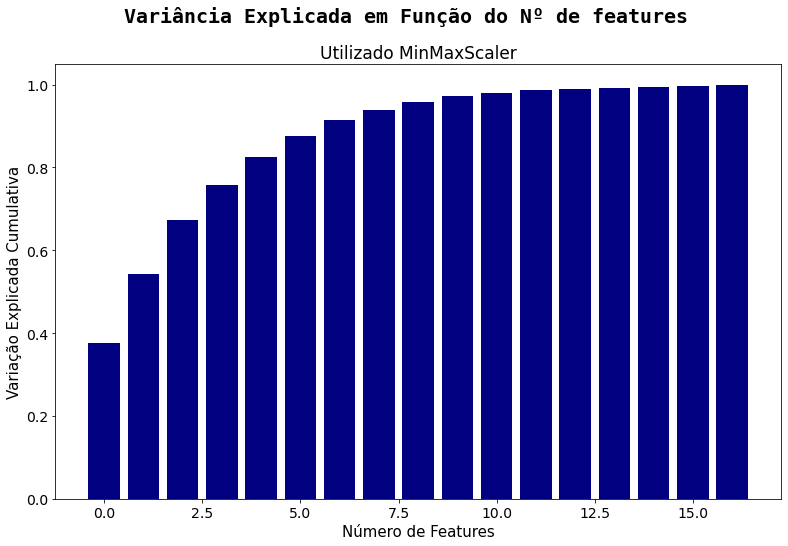

In [30]:
plt.figure()
fig = plt.figure(figsize=(13, 8))

ax = fig.add_subplot(111)
ax.set_xlabel('Número de Features', fontsize=15)
ax.set_ylabel('Variação Explicada Cumulativa', fontsize=15)
plt.tick_params(axis="x", labelsize=14)
plt.tick_params(axis="y", labelsize=14)
#ax.set_title('Variance expliquée en fonction de nombre de CP', fontsize=20)

plt.bar(range(df_minmax.shape[1]), cumsum, color='navy')
plt.suptitle("Variância Explicada em Função do Nº de features", fontsize = 20, fontname = 'monospace', weight = 'bold')
ax.set_title('Utilizado MinMaxScaler', fontsize=17)
plt.show()

In [31]:
#com 10 features
pca_final = PCA(n_components=10)
a = pca_final.fit_transform(df_minmax)
explained_variance = pca_final.explained_variance_ratio_
sum(explained_variance)

0.972040344977541

In [32]:
#com 9 features
pca_final = PCA(n_components=9)
df_m = pca_final.fit_transform(df_minmax)
explained_variance = pca_final.explained_variance_ratio_
sum(explained_variance)

0.9578033955612547

In [33]:
#com 8 features
pca_final = PCA(n_components=9)
a = pca_final.fit_transform(df_minmax)
explained_variance = pca_final.explained_variance_ratio_
sum(explained_variance)

0.9578033955612548

In [34]:
cabecalho = []
for i in range(1, 10):
    elt = 'PCA' + str(i)
    cabecalho.append(elt)

In [35]:
#Selecionado 9 features
pca_ = PCA(n_components=9)
pca_minmax = pca_.fit_transform(df_minmax)
df_minmax_PCA_9_features = pd.DataFrame(data=pca_minmax, columns=cabecalho, index=df_abt_.index)
#gerado dataframe com transformação MinMaxScaler e redução de features com PCA(9 features com 95.78% de variância acumulada)
df_minmax_PCA_9_features
df_minmax_PCA_9_features.to_excel(caminho_temp+'03_00_ReducaoDimensao_df_minmax_PCA_9_features.xlsx', index=True)

## RobustScaler

In [36]:
pca = PCA()
pca.fit_transform(df_robust)
explained_variance = pca.explained_variance_ratio_
cumsum = np.cumsum(explained_variance)
cumsum.shape, df_abt_.shape

((17,), (1658, 17))

<Figure size 432x288 with 0 Axes>

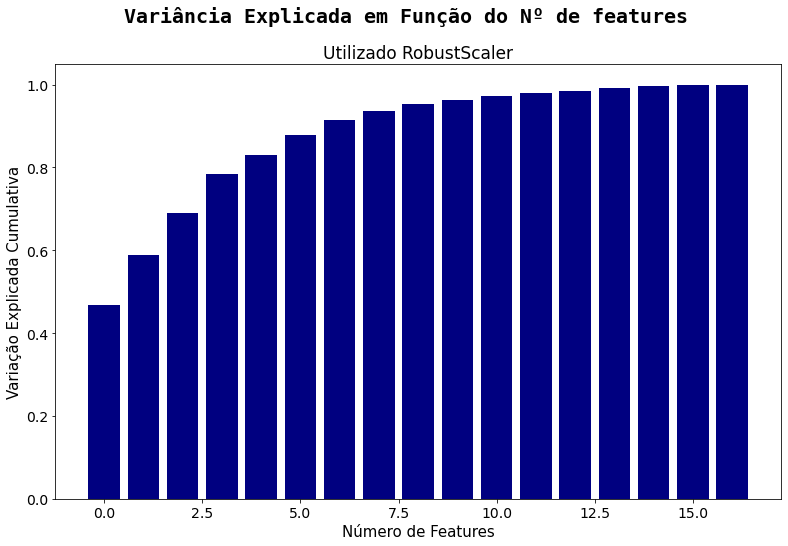

In [37]:
plt.figure()
fig = plt.figure(figsize=(13, 8))

ax = fig.add_subplot(111)
ax.set_xlabel('Número de Features', fontsize=15)
ax.set_ylabel('Variação Explicada Cumulativa', fontsize=15)
plt.tick_params(axis="x", labelsize=14)
plt.tick_params(axis="y", labelsize=14)
#ax.set_title('Variance expliquée en fonction de nombre de CP', fontsize=20)

plt.bar(range(df_robust.shape[1]), cumsum, color='navy')
plt.suptitle("Variância Explicada em Função do Nº de features", fontsize = 20, fontname = 'monospace', weight = 'bold')
ax.set_title('Utilizado RobustScaler', fontsize=17)
plt.show()

In [38]:
#com 11 features
pca_final = PCA(n_components=11)
a = pca_final.fit_transform(df_robust)
explained_variance = pca_final.explained_variance_ratio_
sum(explained_variance)

0.9717350723976296

In [39]:
#com 10 features
pca_final = PCA(n_components=10)
a = pca_final.fit_transform(df_robust)
explained_variance = pca_final.explained_variance_ratio_
sum(explained_variance)

0.9628879234944283

In [40]:
#com 9 features
pca_final = PCA(n_components=9)
a = pca_final.fit_transform(df_robust)
explained_variance = pca_final.explained_variance_ratio_
sum(explained_variance)#com 9 features


0.9526306477337018

In [41]:
#Selecionado 9 features
pca_ = PCA(n_components=9)
pca_robust = pca_.fit_transform(df_robust)
df_robust_PCA_9_features = pd.DataFrame(data=pca_robust, columns=cabecalho, index=df_abt_.index)
#gerado dataframe com transformação MinMaxScaler e redução de features com PCA(9 features com 95.26% de variância acumulada)
df_robust_PCA_9_features.to_excel(caminho_temp+'03_00_ReducaoDimensao_df_robust_PCA_9_features.xlsx', index=True)

### PowerTransformer

In [42]:
pca = PCA()
pca.fit_transform(df_power)
explained_variance = pca.explained_variance_ratio_
cumsum = np.cumsum(explained_variance)
cumsum.shape, df_abt_.shape

((17,), (1658, 17))

<Figure size 432x288 with 0 Axes>

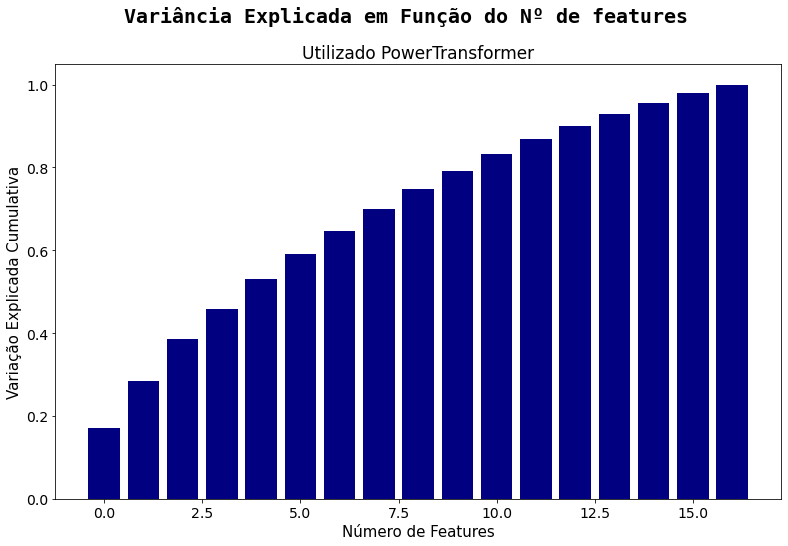

In [43]:
plt.figure()
fig = plt.figure(figsize=(13, 8))

ax = fig.add_subplot(111)
ax.set_xlabel('Número de Features', fontsize=15)
ax.set_ylabel('Variação Explicada Cumulativa', fontsize=15)
plt.tick_params(axis="x", labelsize=14)
plt.tick_params(axis="y", labelsize=14)
#ax.set_title('Variance expliquée en fonction de nombre de CP', fontsize=20)

plt.bar(range(df_power.shape[1]), cumsum, color='navy')
plt.suptitle("Variância Explicada em Função do Nº de features", fontsize = 20, fontname = 'monospace', weight = 'bold')
ax.set_title('Utilizado PowerTransformer', fontsize=17)
plt.show()

In [44]:
#com 15 features
pca_final = PCA(n_components=15)
a = pca_final.fit_transform(df_power)
explained_variance = pca_final.explained_variance_ratio_
sum(explained_variance)

0.9565067150757891

In [45]:
#com 14 features
pca_final = PCA(n_components=14)
a = pca_final.fit_transform(df_power)
explained_variance = pca_final.explained_variance_ratio_
sum(explained_variance)

0.9297552856129647

In [46]:
#com 13 features
pca_final = PCA(n_components=13)
a = pca_final.fit_transform(df_power)
explained_variance = pca_final.explained_variance_ratio_
sum(explained_variance)

0.9001505618701923

In [47]:
#com 9 features
pca_final = PCA(n_components=9)
a = pca_final.fit_transform(df_robust)
explained_variance = pca_final.explained_variance_ratio_
sum(explained_variance)#com 9 features


0.9526306477337017

In [48]:
cabecalho = []
for i in range(1, 16):
    elt = 'PCA' + str(i)
    cabecalho.append(elt)

In [49]:
#Selecionado 15 features
pca_ = PCA(n_components=15)
pca_power = pca_.fit_transform(df_power)
df_power_PCA_15_features = pd.DataFrame(data=pca_power, columns=cabecalho, index=df_abt_.index)
#gerado dataframe com transformação MinMaxScaler e redução de features com PCA(9 features com 95.65% de variância acumulada)
df_power_PCA_15_features.to_excel(caminho_temp+'03_00_ReducaoDimensao_df_power_PCA_15_features.xlsx', index=True)

## <a class="anchor" id="tsne">2.2. t-SNE</a>

In [50]:
"""
O algoritmo t-Distributed Stochastic Neighbor Embedding (t-SNE) reduz a dimensionalidade ao tentar manter instâncias 
semelhantes próximas, ao mesmo tempo em que instâncias diferentes são separadas. É usado principalmente para visualização, 
em particular para exibir clusters de instâncias em espaço de alta dimensão.

"""

'\nO algoritmo t-Distributed Stochastic Neighbor Embedding (t-SNE) reduz a dimensionalidade ao tentar manter instâncias \nsemelhantes próximas, ao mesmo tempo em que instâncias diferentes são separadas. É usado principalmente para visualização, \nem particular para exibir clusters de instâncias em espaço de alta dimensão.\n\n'

## MinMaxScaler

In [51]:
cabecalho = []
for i in range(1, 3):
    elt = 'TSNE' + str(i)
    cabecalho.append(elt)


In [52]:
tsne = TSNE(n_components=2,perplexity=50,n_iter=1000,verbose=1,random_state=43,learning_rate=250)
tsne_final = tsne.fit_transform(df_minmax)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1658 samples in 0.000s...
[t-SNE] Computed neighbors for 1658 samples in 0.125s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1658
[t-SNE] Computed conditional probabilities for sample 1658 / 1658
[t-SNE] Mean sigma: 0.105589
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.959312
[t-SNE] KL divergence after 1000 iterations: 0.948771


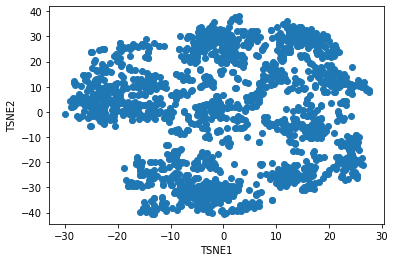

In [53]:
plt.scatter(tsne_final[:, 0], tsne_final[:, 1])
plt.xlabel("TSNE1")
plt.ylabel("TSNE2")
plt.show()

In [54]:
df_minmax_TSNE_2_features = pd.DataFrame(data=tsne_final, columns=cabecalho, index=df_abt_.index)
df_minmax_TSNE_2_features.to_excel(caminho_temp+'03_00_ReducaoDimensao_df_minmax_TSNE_2_features.xlsx', index=True)

## RobustScaler

In [55]:
tsne = TSNE(n_components=2,perplexity=50,n_iter=1000,verbose=1,random_state=43,learning_rate=250)
tsne_final = tsne.fit_transform(df_robust)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1658 samples in 0.000s...
[t-SNE] Computed neighbors for 1658 samples in 0.169s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1658
[t-SNE] Computed conditional probabilities for sample 1658 / 1658
[t-SNE] Mean sigma: 1.307665
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.941338
[t-SNE] KL divergence after 1000 iterations: 1.127810


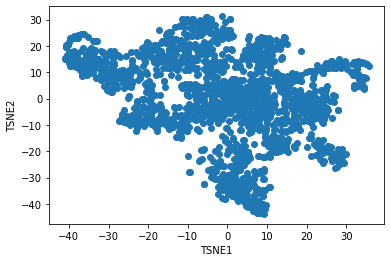

In [56]:
plt.scatter(tsne_final[:, 0], tsne_final[:, 1])
plt.xlabel("TSNE1")
plt.ylabel("TSNE2")
plt.show()

In [57]:
df_robust_TSNE_2_features = pd.DataFrame(data=tsne_final, columns=cabecalho, index=df_abt_.index)
df_robust_TSNE_2_features.to_excel(caminho_temp+'03_00_ReducaoDimensao_df_robust_TSNE_2_features.xlsx', index=True)

## PowerTransformer

In [58]:
tsne = TSNE(n_components=2,perplexity=50,n_iter=1000,verbose=1,random_state=43,learning_rate=250)
tsne_final = tsne.fit_transform(df_power)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1658 samples in 0.000s...
[t-SNE] Computed neighbors for 1658 samples in 0.172s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1658
[t-SNE] Computed conditional probabilities for sample 1658 / 1658
[t-SNE] Mean sigma: 1.418188
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.246429
[t-SNE] KL divergence after 1000 iterations: 1.185021


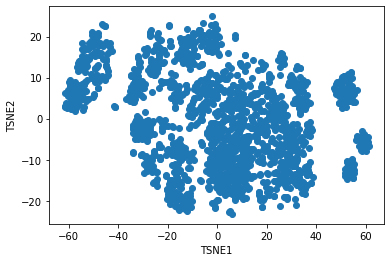

In [59]:
plt.scatter(tsne_final[:, 0], tsne_final[:, 1])
plt.xlabel("TSNE1")
plt.ylabel("TSNE2")
plt.show()

In [60]:
df_power_TSNE_2_features = pd.DataFrame(data=tsne_final, columns=cabecalho, index=df_abt_.index)
df_power_TSNE_2_features.to_excel(caminho_temp+'03_00_ReducaoDimensao_df_power_TSNE_2_features.xlsx', index=True)

## <a class="anchor" id="uma">2.3. UMAP</a>

## MinMaxScaler

In [61]:
cabecalho = []
for i in range(1, 3):
    elt = 'TUMAP' + str(i)
    cabecalho.append(elt)

tumap = umap.UMAP(n_neighbors=50)
tumap_final = tumap.fit_transform(df_minmax)

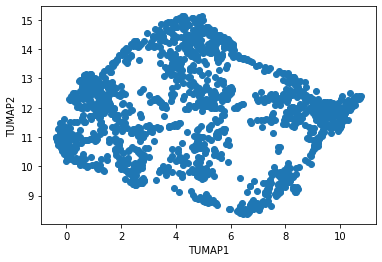

In [62]:
plt.scatter(tumap_final[:, 0], tumap_final[:, 1])
plt.xlabel("TUMAP1")
plt.ylabel("TUMAP2")
plt.show()

In [63]:
df_minmax_TUMAP_2_features = pd.DataFrame(data=tumap_final, columns=cabecalho, index=df_abt_.index)
df_minmax_TUMAP_2_features.to_excel(caminho_temp+'03_00_ReducaoDimensao_df_minmax_UMAP_2_features.xlsx', index=True)

## RobustScaler

In [64]:
tumap = umap.UMAP(n_neighbors=50)
tumap_final = tumap.fit_transform(df_robust)

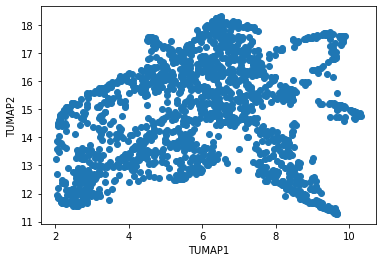

In [65]:
plt.scatter(tumap_final[:, 0], tumap_final[:, 1])
plt.xlabel("TUMAP1")
plt.ylabel("TUMAP2")
plt.show()

In [66]:
df_robust_TUMAP_2_features = pd.DataFrame(data=tumap_final, columns=cabecalho, index=df_abt_.index)
df_robust_TUMAP_2_features.to_excel(caminho_temp+'03_00_ReducaoDimensao_df_robust_UMAP_2_features.xlsx', index=True)

## PowerTransformer

In [67]:
tumap = umap.UMAP(n_neighbors=50)
tumap_final = tumap.fit_transform(df_power)

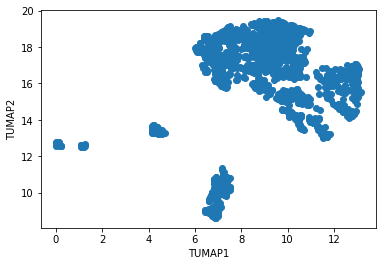

In [68]:
plt.scatter(tumap_final[:, 0], tumap_final[:, 1])
plt.xlabel("TUMAP1")
plt.ylabel("TUMAP2")
plt.show()

In [69]:
df_power_TUMAP_2_features = pd.DataFrame(data=tumap_final, columns=cabecalho, index=df_abt_.index)
df_power_TUMAP_2_features.to_excel(caminho_temp+'03_00_ReducaoDimensao_df_power_UMAP_2_features.xlsx', index=True)

## <a class="anchor" id="semr">3. Sem Redução</a>
[Retorna ao Indice](#etapas)

In [70]:
df_minmax.to_excel(caminho_temp+'03_00_ReducaoDimensao_df_minmax_SemReducao_17_features.xlsx', index=True)
df_robust.to_excel(caminho_temp+'03_00_ReducaoDimensao_df_robust_SemReducao_17_features.xlsx', index=True)
df_power.to_excel(caminho_temp+'03_00_ReducaoDimensao_df_power_SemReducao_17_features.xlsx', index=True)